# <span style="color:Blue"><center> **Proyecto Análisis de Sentimiento y pronóstico precio de la acción NASDAQ**</center></span>
# <span style="color:Green">**Análisis de sentimiento - Exploratorio**</span>


* María Camila Góngora Albán (mcgongoraa@unal.edu.co)
* Neyfer Leandro Gómez Gil (nlgomezg@unal.edu.co)

******

## *Referencias*



## *Contenido*

## *Análisis Descriptivo*

Tweets sobre las principales empresas de 2015 a 2020

Disponible en [kaggle](https://www.kaggle.com/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Tweet.csv)

Este conjunto de datos hace parte del artículo publicado in la Conferencia Internacional en Big Data del 2020 (IEEE) bajo la sexta sesión acerca de Minería Inteligente de Datos, el objetivo es determinar posibles especuladores e influyentes en el mercado de valores. 

Este conjunto de datos contiene más de 3 millones de tweets únicos con su información, acerca de cinco compañías (Amazon, Apple, Google, Microsoft y Tesla) :
* Identificación del tweet
* Autor del tweet
* Fecha de publicación
* Cuerpo del texto del tweet 
* Cantidad de comentarios, me gusta y retweets de los tweets que coinciden con la empresa relacionada.

Los Tweets fueron tomados de Twitter a través de un parsing script basado en _Selenium_.

Este conjunto de datos contiene además los valores diarios de apertura, cierre, VOLUME, HIGH y LOW de las empresas de Amazon, Apple, Google, Microsoft y Tesla etiquetados por fechas.

Los valores provienen del sitio web oficial de NASDAQ y presentan los siguientes atributos: 

* ticker_symbol: Sigla compañia
* company_name: Nombre compañia
* day_date: Día 
* close_value: Valor de cierre
* volume: Volúmen de transacciones
* open_value: Valot de apertura
* high_value: Valor maximo alcanzado en el día
* low value: Valor míínimo alcanzado en el día

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/Tweet_NASDAQ.csv', sep=',')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [6]:
data

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


## *Limpieza del Corpus*

### *Polaridad negativa*

In [8]:
df=data
words = ' '.join(df['body'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [9]:
words[0:500]

'lx21 made $10,008  on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours S&P100 #Stocks Performance $HD $LOW $SBUX $TGT $DVN $IBM $AMZN $F $APA $GM $MS $HAL $DIS $MCD $BMY $XOM  more@ http://12Stocks.com/sp100 $GM $TSLA: Volkswagen Pushes 2014 Record Recall Tally Higher https://pic.twitter.com/WIIc1lW7hW @ProTrad'

In [10]:
cleaned_word[0:500]

'lx21 made $10,008 on $AAPL -Check it out! Learn #howtotrade $EXE $WATT $IMRS $CACH $GMO Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours S&P100 #Stocks Performance $HD $LOW $SBUX $TGT $DVN $IBM $AMZN $F $APA $GM $MS $HAL $DIS $MCD $BMY $XOM more@ $GM $TSLA: Volkswagen Pushes 2014 Record Recall Tally Higher Swing Trading: Up To 8.91% Return In 14 Days #swingtrading #forecast #techstock $MWW $AAPL $TSLA Swing Trading: Up To 8.91% R'

In [11]:
import re
def preprocess(message):
    """
    This function takes a string as input, then performs these operations: 
        - lowercase
        - remove URLs
        - remove ticker symbols 
        - removes punctuation
        - tokenize by splitting the string on whitespace 
        - removes any single character tokens
    
    Parameters
    ----------
        message : The text message to be preprocessed.
        
    Returns
    -------
        tokens: The preprocessed text into tokens.
    """ 
    # Lowercase the twit message
    text = message.lower()
    
    # Replace URLs with a space in the message
    text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
    
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
    
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    text = re.sub('\@[a-zA-Z0-9]*', ' ', text)

    # Replace everything not a letter with a space
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    return text

In [12]:
cleaned_word2=preprocess(cleaned_word)
cleaned_word2[0:500]

'lx   made       on    check it out  learn  howtotrade           insanity of today weirdo massive selling    bid up    cents after hours after non stop selling in trading hours s p     stocks performance                                 more       volkswagen pushes      record recall tally higher swing trading  up to       return in    days  swingtrading  forecast  techstock       swing trading  up to       return in    days  swingtrading  forecast  techstock       swing trading  up to       retur'

In [14]:
from collections import defaultdict, Counter

all_words=[]
for word in range(len(cleaned_word2.split())):
    all_words.append(cleaned_word2.split()[word])
    
all_words  

KeyboardInterrupt: 

In [ ]:
#all_words = [word for message in cleaned_word for word in message.split()]
print('The number of all words: ', len(all_words))

counts = Counter(all_words)
print('The number of unique words: ', len(counts))

bow = sorted(counts, key=counts.get, reverse=True)
print('Top 40 frequent words: ', bow[:40])

In [ ]:
from wordcloud import WordCloud,STOPWORDS
text = " ".join(bow[:150])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(text)

In [ ]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### *Polaridad positiva*

In [39]:
df=data[data['label']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [40]:
words[0:500]

"With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability  According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by in"

In [41]:
cleaned_word[0:500]

"With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by incr"

In [42]:
cleaned_word2=preprocess(cleaned_word)
cleaned_word2[0:500]

'with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability according to the company  s updated strategy for the years             basware targets a long term net sales growth in the range of            with an operating profit margin of            of net sales financing of aspocomp  s growth aspocomp is aggressively pursuing its growth strategy by incr'

In [43]:
from collections import defaultdict, Counter

all_words=[]
for word in range(len(cleaned_word2.split())):
    all_words.append(cleaned_word2.split()[word])
    
all_words  

['with',
 'the',
 'new',
 'production',
 'plant',
 'the',
 'company',
 'would',
 'increase',
 'its',
 'capacity',
 'to',
 'meet',
 'the',
 'expected',
 'increase',
 'in',
 'demand',
 'and',
 'would',
 'improve',
 'the',
 'use',
 'of',
 'raw',
 'materials',
 'and',
 'therefore',
 'increase',
 'the',
 'production',
 'profitability',
 'according',
 'to',
 'the',
 'company',
 's',
 'updated',
 'strategy',
 'for',
 'the',
 'years',
 'basware',
 'targets',
 'a',
 'long',
 'term',
 'net',
 'sales',
 'growth',
 'in',
 'the',
 'range',
 'of',
 'with',
 'an',
 'operating',
 'profit',
 'margin',
 'of',
 'of',
 'net',
 'sales',
 'financing',
 'of',
 'aspocomp',
 's',
 'growth',
 'aspocomp',
 'is',
 'aggressively',
 'pursuing',
 'its',
 'growth',
 'strategy',
 'by',
 'increasingly',
 'focusing',
 'on',
 'technologically',
 'more',
 'demanding',
 'hdi',
 'printed',
 'circuit',
 'boards',
 'pcbs',
 'for',
 'the',
 'last',
 'quarter',
 'of',
 'componenta',
 's',
 'net',
 'sales',
 'doubled',
 'to',
 '

In [44]:
#all_words = [word for message in cleaned_word for word in message.split()]
print('The number of all words: ', len(all_words))

counts = Counter(all_words)
print('The number of unique words: ', len(counts))

bow = sorted(counts, key=counts.get, reverse=True)
print('Top 40 frequent words: ', bow[:40])

The number of all words:  28440
The number of unique words:  4200
Top 40 frequent words:  ['the', 'in', 'to', 'of', 'and', 'eur', 'a', 'for', 'from', 's', 'mn', 'its', 'company', 'said', 'year', 'has', 'm', 'finnish', 'with', 'by', 'net', 'on', 'sales', 'profit', 'will', 'it', 'million', 'is', 'period', 'that', 'mln', 'operating', 'as', 'an', 'quarter', 'at', 'up', 'was', 'oyj', 'group']


In [37]:
from wordcloud import WordCloud,STOPWORDS
text = " ".join(bow[:150])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(text)

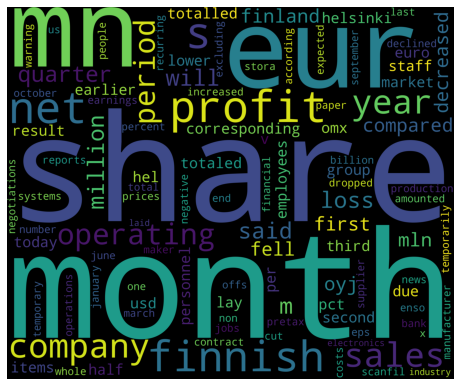

In [38]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()